In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pandemic = pd.read_csv("final/Confirmed cases and deaths.csv")
prepandemic = pd.read_csv("final/prepandemic_v2.csv")
unemployment = pd.read_csv("final/Unemployment_v1.csv")
populations = pd.read_csv("final/co-est2019-alldata.csv")

# Remove all Puerto Rico data
pandemic = pandemic.drop(pandemic[pandemic['stname'] == 'Puerto Rico'].index)

/Users/h0y01c9/opt/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (309,312,314,317,329,332,334) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pandemic.join(prepandemic, lsuffix='fips', rsuffix='fips').join(unemployment, lsuffix='fips', rsuffix='fips').join(unemployment, lsuffix='fips', rsuffix='fips')

,Unnamed: 0fips,stfipsfips,stnamefips,ctyfipsfips,ctynamefips,fipsfips,confirmed_cases_20200122,confirmed_cases_20200123,confirmed_cases_20200124,confirmed_cases_20200125,...,neighbor4_2017fips,neighbor5_2017fips,neighbor6_2017fips,neighbor7_2017fips,neighbor8_2017fips,neighbor9_2017fips,neighbor10_2017fips,neighbor11_2017fips,neighbor12_2017fips,neighbor13_2017fips
0,0,1,Alabama,1,Autauga County,1001,0,0,0,0,...,1101.0,1021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Alabama,3,Baldwin County,1003,0,0,0,0,...,12033.0,1025.0,1129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,Alabama,5,Barbour County,1005,0,0,0,0,...,13259.0,1045.0,13239.0,1113.0,1067.0,NaN,NaN,NaN,NaN,NaN
3,3,1,Alabama,7,Bibb County,1007,0,0,0,0,...,1117.0,1073.0,1021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,Alabama,9,Blount County,1009,0,0,0,0,...,1073.0,1127.0,1055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1,Alabama,11,Bullock County,1011,0,0,0,0,...,1113.0,1101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1,Alabama,13,Butler County,1013,0,0,0,0,...,1041.0,1035.0,1039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1,Alabama,15,Calhoun County,1015,0,0,0,0,...,1029.0,1055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1,Alabama,17,Chambers County,1017,0,0,0,0,...,1123.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1,Alabama,19,Cherokee County,1019,0,0,0,0,...,1029.0,1015.0,13055.0,1055.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Need state and county name
state = pandemic['stname']
county = pandemic['ctyname']

# The confirmed cases and death number is accumulated, used the last available date data
confirmed_cases = pandemic['confirmed_cases_20200502']
deaths = pandemic['death20200502']

In [6]:
# Get days between first confirmed case to now
import datetime
def days(pandemic_row, start = datetime.datetime(2020,1,22), end = datetime.datetime(2020,4,18), min_number = 200, min_precent=0.3):
    end_title = 'confirmed_cases_' +  end.strftime("%Y%m%d")
    
    total_days = (end - start).days + 1
    min_cases = min(pandemic_row[end_title] * min_precent, min_number)

    current = start
    accumulate_cases = 0
    days = 0
    while current <= end:
        title = 'confirmed_cases_' +  current.strftime("%Y%m%d")
        accumulate_cases += pandemic_row[title]
        if accumulate_cases < min_cases:
            days += 1
        else:
            break

        current += datetime.timedelta(days=1)
    
    return total_days - days
case_days = pandemic.apply(lambda x: days(x,end = datetime.datetime(2020,5,2)), axis = 1) 

In [7]:
# Use year 2018(closest) population density
populationdensity=prepandemic['popdensity_2018']
populationdensity_min = populationdensity.min()
populationdensity_mean = populationdensity.mean()
populationdensity_stage = populationdensity_mean - populationdensity_min
def populationdensity_category(populationdensity):
    if populationdensity < populationdensity_mean - populationdensity_stage * 0.9: 
        return '1_Very Low' 
    elif populationdensity < populationdensity_mean - populationdensity_stage * 0.3: 
        return '2_Low'  
    elif populationdensity < populationdensity_mean + populationdensity_stage * 0.3: 
        return '3_Medium'   
    elif populationdensity < populationdensity_mean + populationdensity_stage: 
        return '4_High' 
    else:
        return 'Very_High'
populationdensity_category = prepandemic.apply(lambda x: populationdensity_category(x['popdensity_2018']), axis = 1)

In [8]:
# Get top 3 most populations ethnicity group in the county
def ethnic_group_top(hispanic, white, black, indian, asian, hawaii_na, top):
    ethnic_groups = [('Hispanic', hispanic), ('White', white), ('Black', black), ('Indian', indian), ('Asian', asian), ('Hawaii and N/A', hawaii_na)]
    ethnic_groups = sorted(ethnic_groups, key = lambda x: -x[1])
    return ethnic_groups[top - 1][0]

ethnic_group_top1 = prepandemic.apply(lambda x: ethnic_group_top(x['hispanic_2018'], x['nhwhite_2018'], x['nhblack_2018'], x['nhindian_2018'], x['nhasian_2018'], x['nhhawaii_2018'], 1), axis = 1)
ethnic_group_top2 = prepandemic.apply(lambda x: ethnic_group_top(x['hispanic_2018'], x['nhwhite_2018'], x['nhblack_2018'], x['nhindian_2018'], x['nhasian_2018'], x['nhhawaii_2018'], 2), axis = 1)
ethnic_group_top3 = prepandemic.apply(lambda x: ethnic_group_top(x['hispanic_2018'], x['nhwhite_2018'], x['nhblack_2018'], x['nhindian_2018'], x['nhasian_2018'], x['nhhawaii_2018'], 3), axis = 1)

In [9]:
# Age data has 18 columns, we group them to children, young adult, middle adult, senior
# column1:  age 0-4 prop.
# column2:  age 5-9 prop.
# column3:  age 10-14 prop.
# column4:  age 15-19 prop.
# column5:  age 20-24 prop.
# column6:  age 25-29 prop.
# column7:  age 30-34 prop.
# column8:  age 35-39 prop.
# column9:  age 40-44 prop.
# column10: age 45-49 prop.
# column11: age 50-54 prop.
# column12: age 55-59 prop.
# column13: age 60-64 prop.
# column14: age 65-69 prop.
# column15: age 70-74 prop.
# column16: age 75-79 prop.
# column17: age 80-84 prop.
# column18: age 85+ prop.
def age_group_top(age, top):
    children_poportion = age[0] + age[1] + age[2] + age[3]
    young_adult_poportion = age[4] + age[5] + age[6] + age[7] + age[8]
    middle_adult_poportion = age[9] + age[10] + age[11] + age[12]
    senior_poportion = age[13] + age[14] + age[15] + age[16] + age[17]
    age_group_list = [('Children', children_poportion), ('Young Adult', young_adult_poportion), ('Middle Adult', middle_adult_poportion), ('Senior', senior_poportion)]
    age_group_list = sorted(age_group_list, key = lambda x: -x[1])
    return age_group_list[top - 1][0]
age_groups_top1 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 1), axis = 1)
age_groups_top2 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 2), axis = 1)
age_groups_top3 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 3), axis = 1)
age_groups_top4 = prepandemic.apply(lambda x: age_group_top([x['ageg1_2018'], x['ageg2_2018'], x['ageg3_2018'], x['ageg4_2018'], x['ageg5_2018'], x['ageg6_2018'], x['ageg7_2018'], x['ageg8_2018'], x['ageg9_2018'], x['ageg10_2018'], x['ageg11_2018'], x['ageg12_2018'], x['ageg13_2018'], x['ageg14_2018'], x['ageg15_2018'], x['ageg16_2018'], x['ageg17_2018'], x['ageg18_2018']], 4), axis = 1)

In [10]:
# Get all education adata
education = pd.read_excel("final/Education_By_County.xls")
education = education.drop(education[pd.isna(education['2013 Rural-urban Continuum Code'])].index)

In [11]:
states_map = pd.read_csv("final/states.csv")
states_map

for index, row in states_map.iterrows():
    pc = len(pandemic[pandemic['stname'] == row[1]])
    ec = len(education[education['State'] == row[0]])
    if pc != ec:
        print(f"In education data set[{row[0]}]: {ec} rows, in pandemic dataset[{row[1]}]: {pc} rows")  

In education data set[VA]: 134 rows, in pandemic dataset[Virginia]: 133 rows
In education data set[PR]: 78 rows, in pandemic dataset[Puerto Rico]: 0 rows


In [12]:
va_pandemic = pandemic[pandemic['stname'] == 'Virginia']
va_education = education[education['State'] == 'VA']
for index, row in va_education.iterrows():
    area = row['Area name']
    if len(va_pandemic[va_pandemic['ctyname'] == area]) == 0:
        print(f"{area} is missing in va_pandemic")

Bedford city is missing in va_pandemic


In [13]:
education = education.drop(education[education['Area name'] == 'Bedford city'].index)

#education['Percent of adults completing some college or associate\'s degree, 2014-18']
# education['Percent of adults with a bachelor\'s degree or higher, 2014-18']

# Age data has 18 columns, we group them to children, young adult, middle adult, senior
# column1:  less than high school diploma poportion.
# column2:  high school diploma only poportion.
# column3:  some college or associate degress poportion.
# column4:  bachelor or higher education poportion.
def education_group_top(less_than_high_school, high_school, college, bachelor_above, top):
    education_group = [('Less_than_high_school', less_than_high_school), ('High_school', high_school), ('Some_college_or_associate', college), ('Bachelor_Or_Above', bachelor_above)]
    education_group = sorted(education_group, key = lambda x: -x[1])
    return education_group[top - 1][0]

education_group_top1 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 1), axis=1)
education_group_top2 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 2), axis=1)
education_group_top3 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 3), axis=1)
education_group_top4 = education.apply(lambda x: education_group_top(x['Percent of adults with less than a high school diploma, 2014-18'], 
                                                                     x['Percent of adults with a high school diploma only, 2014-18'], 
                                                                     x['Percent of adults completing some college or associate\'s degree, 2014-18'], 
                                                                     x['Percent of adults with a bachelor\'s degree or higher, 2014-18'], 4), axis=1)

In [14]:
populations = pd.read_excel("final/co-est2019-annres.xlsx")
populations['county'] = populations['Geographic Area'].apply(lambda x: x.split(',')[0][1:])
populations['state'] = populations['Geographic Area'].apply(lambda x: x.split(',')[1])
population = populations['Census']

In [15]:
result = pd.concat([state, county], axis=1)
                    
# result['confirmed_cases'] = confirmed_cases
# result['deaths'] = deaths
result['population'] = population
# result['days'] = case_days
result['avearge_case'] = (100000.0) * confirmed_cases / case_days / population # Daily confirmed case per 100k people
result['total_cases'] = confirmed_cases
result['deaths'] = deaths
result['populationdensity'] = populationdensity_category
result['toppest_ethnicity'] = ethnic_group_top1
result['second_ethnicity'] = ethnic_group_top2
result['third_ethnicity'] = ethnic_group_top3
result['toppest_age_group'] = age_groups_top1
result['second_age_group'] = age_groups_top2
result['third_age_group'] = age_groups_top3
result['fourth_age_group'] = age_groups_top4
result['top_education'] = education_group_top1
result['second_top_education'] = education_group_top2
result['popdensity'] = prepandemic['popdensity_2018']
result['precent_Hispanic'] = prepandemic['hispanic_2018'] 
result['precent_White'] = prepandemic['nhwhite_2018'] 
result['precent_Black'] = prepandemic['nhblack_2018'] 
result['precent_Idian'] = prepandemic['nhindian_2018'] 
result['precent_Asian'] = prepandemic['nhasian_2018'] 
result['precent_Hawaii'] = prepandemic['nhhawaii_2018']
result['bachelor'] = education['Percent of adults with a bachelor\'s degree or higher, 2014-18']
result['college'] = education['Percent of adults completing some college or associate\'s degree, 2014-18']
result['highschool'] = education['Percent of adults with a high school diploma only, 2014-18']
result['lessthanhighschool'] = education['Percent of adults with less than a high school diploma, 2014-18']
result['precent_under_20'] = prepandemic['ageg1_2018'] + prepandemic['ageg2_2018'] + prepandemic['ageg3_2018'] + prepandemic['ageg4_2018']
result['precent_20_to_40'] = prepandemic['ageg5_2018'] + prepandemic['ageg6_2018'] + prepandemic['ageg7_2018'] + prepandemic['ageg8_2018'] + prepandemic['ageg9_2018']
result['precent_40_to_60'] = prepandemic['ageg10_2018'] + prepandemic['ageg11_2018'] + prepandemic['ageg12_2018'] + prepandemic['ageg13_2018']
result['precent_above_60'] = prepandemic['ageg14_2018'] + prepandemic['ageg15_2018'] + prepandemic['ageg16_2018'] + prepandemic['ageg17_2018'] + prepandemic['ageg18_2018']

In [16]:
# Binary Target only has low and high
def quantile_target_rank(rank, total):
    if (rank <= total / 4.0):
        return "1_Low"
    if (rank >= total * 3.0 / 4.0):
        return "3_High"
    return "2_Medium"

# Binary Target only has low and high
def binary_target_rank(rank, total):
    if (rank <= total / 2.0):
        return "1_Low"
    return "2_High"

total = len(result)

result['quantile_target_rank'] = result['avearge_case'].rank().apply(lambda r: quantile_target_rank(r, total))
result['binary_target_rank'] = result['avearge_case'].rank().apply(lambda r: binary_target_rank(r, total))

In [17]:
result['quantile_target_rank'].value_counts()

2_Medium    1571
3_High       786
1_Low        785
Name: quantile_target_rank, dtype: int64

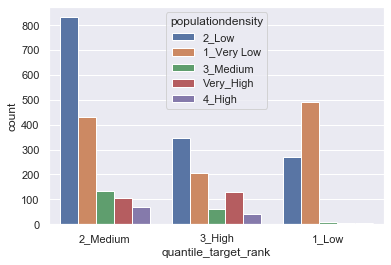

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="quantile_target_rank", hue='populationdensity', data=result)

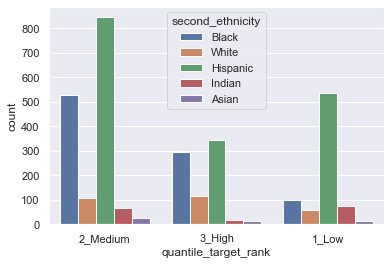

In [19]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="quantile_target_rank", hue='second_ethnicity', data=result)

In [20]:
result.to_csv('final/model.csv')

In [21]:
X = result[['populationdensity', 'toppest_ethnicity', 'second_ethnicity', 'third_ethnicity',
           'toppest_age_group', 'second_age_group', 'third_age_group', 'fourth_age_group',
           'top_education', 'second_top_education', 'popdensity', 'precent_Hispanic',
           'precent_White', 'precent_Black', 'precent_Idian', 'precent_Asian', 'precent_Hawaii',
           'bachelor', 'college', 'highschool', 'lessthanhighschool', 'precent_under_20',
           'precent_20_to_40', 'precent_40_to_60', 'precent_above_60', 'avearge_case', 'total_cases']]

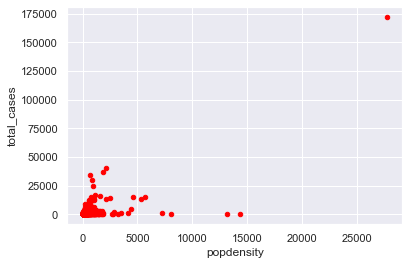

In [22]:
result.plot(kind='scatter', x='popdensity', y='total_cases', color='red')

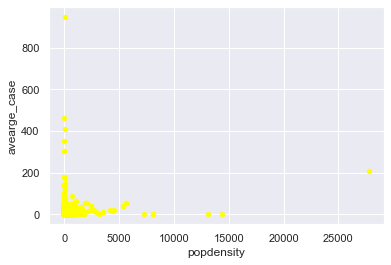

In [23]:
result.plot(kind='scatter', x='popdensity', y='avearge_case', color='yellow')

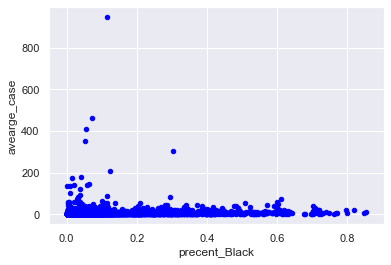

In [24]:
result.plot(kind='scatter', x='precent_Black', y='avearge_case', color='blue')

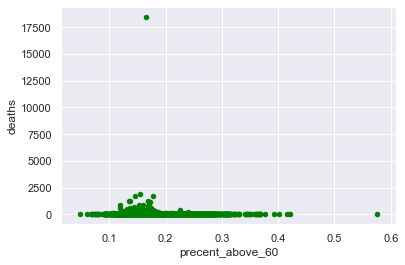

In [25]:
result.plot(kind='scatter', x='precent_above_60', y='deaths', color='green')

In [26]:
popdensity_and_cases = result[['popdensity', 'precent_above_60', 'avearge_case']]
popdensity_and_cases.corr(method='pearson')

,popdensity,precent_above_60,avearge_case
popdensity,1.000000,-0.123427,0.129762
precent_above_60,-0.123427,1.000000,-0.094621
avearge_case,0.129762,-0.094621,1.000000


In [27]:
popdensity_and_cases.corr(method='kendall')

,popdensity,precent_above_60,avearge_case
popdensity,1.000000,-0.317168,0.262035
precent_above_60,-0.317168,1.000000,-0.199428
avearge_case,0.262035,-0.199428,1.000000


In [28]:
popdensity_and_cases.corr(method='spearman')

,popdensity,precent_above_60,avearge_case
popdensity,1.000000,-0.438584,0.371283
precent_above_60,-0.438584,1.000000,-0.290596
avearge_case,0.371283,-0.290596,1.000000


In [29]:
popdensity_and_cases = result[['popdensity', 'avearge_case']]

In [30]:
btr = result['quantile_target_rank'].apply(lambda x: 0 if x == 'Low' else 1)
from scipy import stats
stats.pointbiserialr(btr, result['avearge_case'])

/Users/h0y01c9/opt/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


PointbiserialrResult(correlation=nan, pvalue=nan)

In [31]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
populationdensity_onehot = label_encoder.fit_transform(populationdensity_category)
ethnic_group_top1_onehot = label_encoder.fit_transform(ethnic_group_top1)
ethnic_group_top2_onehot = label_encoder.fit_transform(ethnic_group_top2)
ethnic_group_top3_onehot = label_encoder.fit_transform(ethnic_group_top3)

age_groups_top1_onehot = label_encoder.fit_transform(age_groups_top1)
age_groups_top2_onehot = label_encoder.fit_transform(age_groups_top2)
age_groups_top3_onehot = label_encoder.fit_transform(age_groups_top3)
age_groups_top4_onehot = label_encoder.fit_transform(age_groups_top4)
education_group_top1_onehot = label_encoder.fit_transform(education_group_top1)
education_group_top2_onehot = label_encoder.fit_transform(education_group_top2)
binary_target_rank_onehot = label_encoder.fit_transform(result['quantile_target_rank'])

In [33]:
po = populationdensity_onehot.reshape(-1, 1)

In [34]:
mutual_info_classif(po, binary_target_rank_onehot, discrete_features=True)

array([0.07224461])

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(result[['popdensity']], result['quantile_target_rank'],btr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from sklearn import preprocessing

x = result[['popdensity', 'precent_White', 'precent_Black', 'precent_Idian', 'precent_Asian',
           'precent_Hawaii', 'bachelor', 'college', 'highschool', 'lessthanhighschool',
           'precent_under_20', 'precent_20_to_40', 'precent_40_to_60', 'precent_above_60']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled, columns = ['normalized_popdensity', 'normalized_precent_White', 'normalized_precent_Black',
                             'normalized_precent_Idian', 'normalized_precent_Asian', 'normalized_precent_Hawaii', 
                             'normalized_bachelor', 'normalized_college', 'normalized_highschool', 
                             'normalized_lessthanhighschool', 'normalized_precent_under_20', 'normalized_precent_20_to_40', 
                             'normalized_precent_40_to_60', 'normalized_precent_above_60'])
result1 = pd.concat([result, normalized_df], axis=1, sort=False)

In [37]:
acrquired_target = pd.read_excel("final/acquired_target.xlsx")
result1['trend_last_14']=acrquired_target['acceleration_14']
result1['trend_last_7']=acrquired_target['acceleration_7']

In [203]:
demographic = pd.read_excel("final/demographic_data_with_covid19_measures_dispafam.xlsx")

In [204]:
result1.to_excel('final/covid19.xlsx')

In [205]:
all_results = pandemic.join(prepandemic, lsuffix='fips', rsuffix='fips') \
                      .join(unemployment, lsuffix='fips', rsuffix='fips') \
                      .join(demographic, lsuffix='fips', rsuffix='fips') \
                      .join(education, lsuffix='fips', rsuffix='fips') 

In [206]:
all_results['precent_under_20'] = all_results['ageg1_2018'] + all_results['ageg2_2018'] + all_results['ageg3_2018'] + all_results['ageg4_2018']
all_results['precent_20_to_40'] = all_results['ageg5_2018'] + all_results['ageg6_2018'] + all_results['ageg7_2018'] + all_results['ageg8_2018'] + all_results['ageg9_2018']
all_results['precent_40_to_60'] = all_results['ageg10_2018'] + all_results['ageg11_2018'] + all_results['ageg12_2018'] + all_results['ageg13_2018']
all_results['precent_above_60'] = all_results['ageg14_2018'] + all_results['ageg15_2018'] + all_results['ageg16_2018'] + all_results['ageg17_2018'] + all_results['ageg18_2018']

In [207]:
list(all_results)

['Unnamed: 0fips',
 'stfipsfips',
 'stnamefips',
 'ctyfipsfips',
 'ctynamefips',
 'fipsfips',
 'confirmed_cases_20200122',
 'confirmed_cases_20200123',
 'confirmed_cases_20200124',
 'confirmed_cases_20200125',
 'confirmed_cases_20200126',
 'confirmed_cases_20200127',
 'confirmed_cases_20200128',
 'confirmed_cases_20200129',
 'confirmed_cases_20200130',
 'confirmed_cases_20200131',
 'confirmed_cases_20200201',
 'confirmed_cases_20200202',
 'confirmed_cases_20200203',
 'confirmed_cases_20200204',
 'confirmed_cases_20200205',
 'confirmed_cases_20200206',
 'confirmed_cases_20200207',
 'confirmed_cases_20200208',
 'confirmed_cases_20200209',
 'confirmed_cases_20200210',
 'confirmed_cases_20200211',
 'confirmed_cases_20200212',
 'confirmed_cases_20200213',
 'confirmed_cases_20200214',
 'confirmed_cases_20200215',
 'confirmed_cases_20200216',
 'confirmed_cases_20200217',
 'confirmed_cases_20200218',
 'confirmed_cases_20200219',
 'confirmed_cases_20200220',
 'confirmed_cases_20200221',
 'confi

In [208]:
# Get days between first confirmed case to now
import datetime
def cases_over_population(result_row, start = datetime.datetime(2020,1,22), end = datetime.datetime(2020,4,18), min_number = 200, min_precent=0.3):
    end_title = 'confirmed_cases_' +  end.strftime("%Y%m%d")
    
    total_days = (end - start).days + 1
    min_cases = min(result_row[end_title] * min_precent, min_number)

    current = start
    accumulate_cases = 0
    days = 0
    while current <= end:
        title = 'confirmed_cases_' +  current.strftime("%Y%m%d")
        accumulate_cases += result_row[title]
        if accumulate_cases < min_cases:
            days += 1
        else:
            break

        current += datetime.timedelta(days=1)
        
    if result_row[end_title] == 0:
        return 0
    else:
        return result_row[end_title] / (total_days - days) / float(result_row['Population'])

all_results['cases_over_population'] = all_results.apply(lambda x: cases_over_population(x,end = datetime.datetime(2020,5,2)), axis = 1) 

In [209]:
all_results

,Unnamed: 0fips,stfipsfips,stnamefips,ctyfipsfips,ctynamefips,fipsfips,confirmed_cases_20200122,confirmed_cases_20200123,confirmed_cases_20200124,confirmed_cases_20200125,...,"Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",precent_under_20,precent_20_to_40,precent_40_to_60,precent_above_60,cases_over_population
0,0,1,Alabama,1,Autauga County,1001,0,0,0,0,...,10291.0,11.3,32.6,28.4,27.7,0.259420,0.316235,0.268718,0.155627,2.187400e-05
1,1,1,Alabama,3,Baldwin County,1003,0,0,0,0,...,46075.0,9.7,27.6,31.3,31.3,0.236994,0.282857,0.275715,0.204433,2.371976e-05
2,2,1,Alabama,5,Barbour County,1005,0,0,0,0,...,2220.0,27.0,35.7,25.1,12.2,0.228769,0.318275,0.258752,0.194204,6.912905e-05
3,3,1,Alabama,7,Bibb County,1007,0,0,0,0,...,1813.0,16.8,47.3,24.4,11.5,0.225536,0.338482,0.271250,0.164732,6.250000e-05
4,4,1,Alabama,9,Blount County,1009,0,0,0,0,...,5010.0,19.8,34.0,33.5,12.6,0.253544,0.297009,0.267082,0.182365,1.921008e-05
5,5,1,Alabama,11,Bullock County,1011,0,0,0,0,...,945.0,24.8,39.7,22.3,13.3,0.229631,0.341389,0.265141,0.163839,3.835953e-05
6,6,1,Alabama,13,Butler County,1013,0,0,0,0,...,2235.0,15.4,43.9,24.6,16.1,0.244512,0.292632,0.259858,0.202998,2.124908e-04
7,7,1,Alabama,15,Calhoun County,1015,0,0,0,0,...,14219.0,15.9,32.4,33.7,18.0,0.243076,0.314945,0.264804,0.177175,2.522251e-05
8,8,1,Alabama,17,Chambers County,1017,0,0,0,0,...,3118.0,18.6,38.4,29.7,13.2,0.228499,0.297873,0.278417,0.195210,2.498884e-04
9,9,1,Alabama,19,Cherokee County,1019,0,0,0,0,...,2407.0,19.8,38.3,29.0,12.9,0.212623,0.262254,0.295406,0.229717,1.646325e-05


In [219]:
all_lot_variables = all_results[['stnamefips', 'ctynamefips', 'fipsfips', 
                                 'popdensity_2018', 'hispanic_2018',
            'nhwhite_2018', 'nhblack_2018', 'nhindian_2018', 'nhasian_2018', 'nhhawaii_2018',
            'precent_under_20', 'precent_20_to_40', 'precent_40_to_60', 'precent_above_60',
            'Percent of adults with a bachelor\'s degree or higher, 2014-18',
            'Percent of adults completing some college or associate\'s degree, 2014-18',
            'Percent of adults with a high school diploma only, 2014-18',
            'Percent of adults with less than a high school diploma, 2014-18',
            'cases_over_population', 'ICU_Beds',
            'Births_2018','Deaths_2018','NATURAL_INC_2018','INTERNATIONAL_MIG_2018',
            'DOMESTIC_MIG_2018','NET_MIG_2018','RESIDUAL_2018','GQ_ESTIMATES_2018',
            'R_birth_2018','R_death_2018','R_NATURAL_INC_2018',
            'R_INTERNATIONAL_MIG_2018','R_DOMESTIC_MIG_2018','R_NET_MIG_2018',
            'POVALL_2018','CI90LBAll_2018','CI90UBALL_2018','PCTPOVALL_2018','CI90LBALLP_2018',
            'CI90UBALLP_2018','POV017_2018','CI90LB017_2018','CI90UB017_2018','PCTPOV017_2018',
            'CI90LB017P_2018','CI90UB017P_2018','POV517_2018','CI90LB517_2018','CI90UB517_2018',
            'PCTPOV517_2018','CI90LB517P_2018','CI90UB517P_2018','MEDHHINC_2018','CI90LBINC_2018',
            'CI90UBINC_2018','Civilian_labor_force_2018','Employed_2018','Unemployed_2018',
            'Median_Household_Income_2018','Med_HH_Income_Percent_of_State_Total_2018',
            'Housing_units','Area_in_square_miles___Total_area','Area_in_square_miles___Water_area',
            'Area_in_square_miles___Land_area','Density_per_square_mile_of_land_area___Population',
            'Density_per_square_mile_of_land_area___Housing_units',
            'Total_Male','Total_Female','Total_age0to17','Male_age0to17','Female_age0to17',
            'Total_age18to64','Male_age18to64','Female_age18to64','Total_age65plus',
            'Male_age65plus','Female_age65plus','Total_age85plusr','Male_age85plusr','Female_age85plusr',
            'TOT_MALE','TOT_FEMALE','WA_MALE','WA_FEMALE','BA_MALE','BA_FEMALE','IA_MALE','IA_FEMALE',
            'AA_MALE','AA_FEMALE','NA_MALE','NA_FEMALE','TOM_MALE','TOM_FEMALE','WAC_MALE','WAC_FEMALE',
            'BAC_MALE','BAC_FEMALE','IAC_MALE','IAC_FEMALE','AAC_MALE','AAC_FEMALE','NAC_MALE',
            'NAC_FEMALE','NH_MALE','NH_FEMALE','NHWA_MALE','NHWA_FEMALE','NHBA_MALE','NHBA_FEMALE',
            'NHIA_MALE','NHIA_FEMALE','NHAA_MALE','NHAA_FEMALE','NHNA_MALE','NHNA_FEMALE','NHTOM_MALE',
            'NHTOM_FEMALE','NHWAC_MALE','NHWAC_FEMALE','NHBAC_MALE','NHBAC_FEMALE','NHIAC_MALE','NHIAC_FEMALE',
            'NHAAC_MALE','NHAAC_FEMALE','NHNAC_MALE','NHNAC_FEMALE','H_MALE','H_FEMALE','HWA_MALE',
            'HWA_FEMALE','HBA_MALE','HBA_FEMALE','HIA_MALE','HIA_FEMALE','HAA_MALE','HAA_FEMALE','HNA_MALE',
            'HNA_FEMALE','HTOM_MALE','HTOM_FEMALE','HWAC_MALE','HWAC_FEMALE','HBAC_MALE','HBAC_FEMALE',
            'HIAC_MALE','HIAC_FEMALE','HAAC_MALE','HAAC_FEMALE','HNAC_MALE','HNAC_FEMALE','All_Specialties_(AAMC)',
            'Allergy_&_Immunology_(AAMC)','Anatomic/Clinical_Pathology_(AAMC)','Anesthesiology_(AAMC)',
            'Cardiovascular_Disease_(AAMC)','Child_&_Adolescent_Psychiatry**_(AAMC)','Critical_Care_Medicine_(AAMC)',
            'Dermatology_(AAMC)','Emergency_Medicine_(AAMC)','Endocrinology_Diabetes_&_Metabolism_(AAMC)',
            'Family_Medicine/General_Practice_(AAMC)','Gastroenterology_(AAMC)','General_Surgery_(AAMC)',
            'Geriatric_Medicine***_(AAMC)','Hematology_&_Oncology_(AAMC)','Infectious_Disease_(AAMC)',
            'Internal_Medicine_(AAMC)','Internal_Medicine/Pediatrics_(AAMC)','Interventional_Cardiology_(AAMC)',
            'Neonatal_Perinatal_Medicine_(AAMC)','Nephrology_(AAMC)','Neurological_Surgery_(AAMC)','Neurology_(AAMC)',
            'Neuroradiology_(AAMC)','Obstetrics_&_Gynecology_(AAMC)','Ophthalmology_(AAMC)','Orthopedic_Surgery_(AAMC)',
            'Otolaryngology_(AAMC)','Pain_Medicine_&_Pain_Management_(AAMC)','Pediatrics**_(AAMC)',
            'Physical_Medicine_&_Rehabilitation_(AAMC)','Plastic_Surgery_(AAMC)','Preventive_Medicine_(AAMC)',
            'Psychiatry_(AAMC)','Pulmonary_Disease_(AAMC)','Radiation_Oncology_(AAMC)','Radiology_&_Diagnostic_Radiology_(AAMC)',
            'Rheumatology_(AAMC)','Sports_Medicine_(AAMC)','Thoracic_Surgery_(AAMC)','Urology_(AAMC)',
            'Vascular_&_Interventional_Radiology_(AAMC)','Vascular_Surgery_(AAMC)','Total_nurse_practitioners_(2019)',
            'Total_physician_assistants_(2019)','Total_Hospitals_(2019)','Internal_Medicine_Primary_Care_(2019)','Family_Medicine/General_Practice_Primary_Care_(2019)','Pediatrics_Primary_Care_(2019)','Obstetrics_&_Gynecology_Primary_Care_(2019)',
            'Geriatrics_Primary_Care_(2019)','Total_Primary_Care_Physicians_(2019)','Psychiatry_specialists_(2019)',
            'Surgery_specialists_(2019)','Anesthesiology_specialists_(2019)','Emergency_Medicine_specialists_(2019)',
            'Radiology_specialists_(2019)','Cardiology_specialists_(2019)','Oncology_(Cancer)_specialists_(2019)',
            'Endocrinology_Diabetes_and_Metabolism_specialists_(2019)','All_Other_Specialties_specialists_(2019)',
            'Total_Specialist_Physicians_(2019)','ICU_Beds',
            'transit_scores___population_weighted_averages_aggregated_from_town/city_level_to_county',
            'crime_rate_per_100000','COUNTY_POPULATION_AGENCIES_REPORT_ARRESTS','COUNTY_POPULATION_AGENCIES_REPORT_CRIMES',]]

In [220]:
# Binary Target only has low and high
def quantile_target_group(rank, total):
    if (rank <= total / 4.0):
        return "1_Low"
    if (rank >= total * 3.0 / 4.0):
        return "3_High"
    return "2_Medium"

total = len(all_lot_variables)

all_lot_variables['target'] = all_lot_variables['cases_over_population'].rank().apply(lambda r: binary_target_group(r, total))

/Users/h0y01c9/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [223]:
all_lot_variables.to_csv('final/covid19_many_variables.csv')

In [228]:
new_variables = pd.read_excel("final/covid19_many_variables.xlsx")

In [229]:
new_variables

,state,county,fips,popdensity,hispanic,nhwhite,nhblack,nhindian,nhasian,nhhawaii,...,Oncology_Cancer_specialists,Endocrinology_Diabetes_and_Metabolism_specialists,All_Other_Specialties_specialists,Total_Specialist_Physicians,ICU_Beds.1,transit_scores_population_weighted_averages_aggregated_from_towncity_level_to_county,crime_rate_per_100000,COUNTY_POPULATION_AGENCIES_REPORT_ARRESTS,COUNTY_POPULATION_AGENCIES_REPORT_CRIMES,target
0,Alabama,Autauga County,1001,36.113876,0.029658,0.743080,0.193432,0.004370,0.012050,0.000773,...,2.741447,0.807646,29.791911,72.142154,6.0,0.0,2.516019e+09,57161.0,54604.0,2_Medium
1,Alabama,Baldwin County,1003,52.949490,0.046468,0.831113,0.087840,0.006701,0.011343,0.000509,...,10.749732,3.166933,116.819699,282.882982,51.0,368329051.0,2.280863e+08,187467.0,187467.0,2_Medium
2,Alabama,Barbour County,1005,10.854899,0.042764,0.456413,0.480326,0.003416,0.004542,0.001085,...,1.226776,0.361415,13.331641,32.283033,5.0,0.0,1.772788e+09,27228.0,25566.0,3_High
3,Alabama,Bibb County,1007,13.894338,0.026250,0.745893,0.211205,0.003839,0.002321,0.000268,...,1.104448,0.325377,12.002281,29.063942,0.0,158361697.0,2.176617e+09,22907.0,22857.0,3_High
4,Alabama,Blount County,1009,34.632576,0.095712,0.868862,0.014627,0.005152,0.002784,0.000363,...,2.851843,0.840169,30.991604,75.047251,6.0,0.0,2.108101e+09,57909.0,57909.0,2_Medium
5,Alabama,Bullock County,1011,6.284952,0.079601,0.212172,0.695403,0.002367,0.001282,0.000493,...,0.499861,0.147262,5.432104,13.154029,0.0,0.0,5.263653e+09,10584.0,10584.0,2_Medium
6,Alabama,Butler County,1013,9.781300,0.015091,0.512551,0.445579,0.003506,0.012703,0.000457,...,0.970337,0.285867,10.544861,25.534749,7.0,0.0,5.378732e+09,20741.0,20733.0,3_High
7,Alabama,Calhoun County,1015,72.825485,0.039107,0.720250,0.208502,0.004095,0.009319,0.000901,...,5.634510,1.659959,61.231457,148.274112,24.0,848042143.0,5.807977e+09,122213.0,118270.0,2_Medium
8,Alabama,Chambers County,1017,21.756077,0.025614,0.552313,0.395657,0.002320,0.012673,0.000238,...,1.657412,0.488283,18.011458,43.615376,0.0,0.0,5.620280e+09,34075.0,34075.0,3_High
9,Alabama,Cherokee County,1019,18.158186,0.016211,0.916564,0.042409,0.005685,0.003150,0.000038,...,1.283527,0.378134,13.948365,33.776453,0.0,0.0,4.159829e+09,26141.0,26162.0,2_Medium
